# Vacant Lots as Sites for Insurgent Strategies Toward Healing

##   Group: LandAccess4All
Lupe Rentreria Salome and Mel Liu

### How did both of us decide to map land in Los Angeles?

In 222A Histories and Theories of Planning, we learned about how research is often used to answer questions we already know the answers to. What both of us don't know the answer to is what are the possibilities for taking land back admidst housing shortages and privitazion, as well as goverment misuse of public lands. How could land exist outside colonial frameworks?

Urban planning is results from contestation of spaces and visions. Despite contenstation, how might be be able to hold space for collaoration and community? How many and what types of vacant lots exists?

We hope that making a map of vacant land parcels available to community members who are building people power through land trusts, and seeking rematriation efforts, can benefit from this information.

## Our Data

### [Vacant Parcels from the County Assessor](https://data.lacounty.gov/Parcel-/Vacant-Parcels-LA-County-from-ASR-Use-Code/vcaw-zeg9)

"Valuation and property description for parcels on the Assessor's annual secured assessment roll for 2015."

*The file was close to 75 mb, I reduced down to 39 mb by deleting empty or redundant columns first. I will refer to the above link for the metadata on the meaning of the other columns.

### [Vacant Land Data: Community Boundaries](https://data.lacounty.gov/GIS-Data/Community-Boundaries-CSA-/g4rb-en2z)

Communities are one of the most complex geographic issues in the County of Los Angeles, due to historical narratives, perceptions of value, intense public interest, and shifts over time. The County has a need to establish a consistent geographic reporting base that will enable statistics and information to reported to the Board, that attempts to represent all of the interactions but is primarily focused on reporting.

In [1]:
# libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sodapy import Socrata

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'OpenSeaMap': {'url': 'https://tiles.openseamap.org/seamark/{z}/{x}/{y}.png',
  'html_attribution': 'Map data: &copy; <a href="http://www.openseamap.org">OpenSeaMap</a> contributors',
  'attribution': 'Map data: (C) OpenSeaMap contributors',
  'name': 'OpenSeaMap'},
 'OPNVKarte': {'url': 'https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': 'Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': 'Map memomaps.de CC-BY-SA, map data (C) OpenStreetMap contributors',
  'name': 'OPNVKarte'},
 'OpenTopoMap': {'url': 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
  'max_zoom': 17,
  'html_attribution': 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)',
  'attribution': 'Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA)',
  'name': 'OpenTopoMap'},
 'OpenRailwayMap': {'url': 'https://{s}.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
  'max_

In [3]:
# connect to the data portal
client = Socrata("data.lacounty.gov", None)

# First 5000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vcaw-zeg9", limit=180000, where="taxratearea_city=='LOS ANGELES'")

# Convert to pandas DataFrame
vacdf = pd.DataFrame.from_records(results)

vacdf.sample(2)

usecodedescchar1 roll_homeownersexemp situsunit recordingdate  \
18625      Residential                    0                19901002   
27196      Residential                    0                20081024   

      effectiveyearbuilt istaxableparcel roll_totlandimp roll_perspropexemp  \
18625                  0               Y          348153                  0   
27196                  0               Y          129812                  0   

                               parcelboundarydescription roll_landbaseyear  \
18625  LOT BD NW BY SE LINE OF TR NO 26008 E BY N AND...              1985   
27196  POR LOTS 528 AND 529 TR=104 AND LOTS 2,3 AND P...              2009   

       ...                                         location_1 bathrooms  \
18625  ...  {'latitude': '34.07104446', 'needs_recoding': ...         0   
27196  ...  {'latitude': '34.0913663', 'needs_recoding': F...         0   

      sqftmain situsdirection roll_realestateexemp   center_lat situszip  \
18625        0                                   0  34.07104446            
27196        0                                   0  34.09136630            

      yearbuilt propertylocation situszip5  
18625         0              NaN       NaN  
27196         0              NaN       NaN  

[2 rows x 51 columns]

In [4]:
vacdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33091 entries, 0 to 33090
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   usecodedescchar1           33080 non-null  object
 1   roll_homeownersexemp       33091 non-null  object
 2   situsunit                  33091 non-null  object
 3   recordingdate              33091 non-null  object
 4   effectiveyearbuilt         33091 non-null  object
 5   istaxableparcel            33091 non-null  object
 6   roll_totlandimp            33091 non-null  object
 7   roll_perspropexemp         33091 non-null  object
 8   parcelboundarydescription  33091 non-null  object
 9   roll_landbaseyear          33091 non-null  object
 10  situscity                  33091 non-null  object
 11  roll_impbaseyear           33091 non-null  object
 12  usetype                    33080 non-null  object
 13  cluster                    33091 non-null  object
 14  adminr

In [5]:
# convert df to gdf for vacant parcels
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
vacgdf = gpd.GeoDataFrame(vacdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(vacdf.center_lon, vacdf.center_lat))

In [6]:
# output the data's projection
vacgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Mapping the Data
### adding a basemap

In [7]:
# reproject to web mercator - CHANGE to 4326 for our clean notebook
vacgdf_web_mercator = vacgdf.to_crs(epsg=3857)

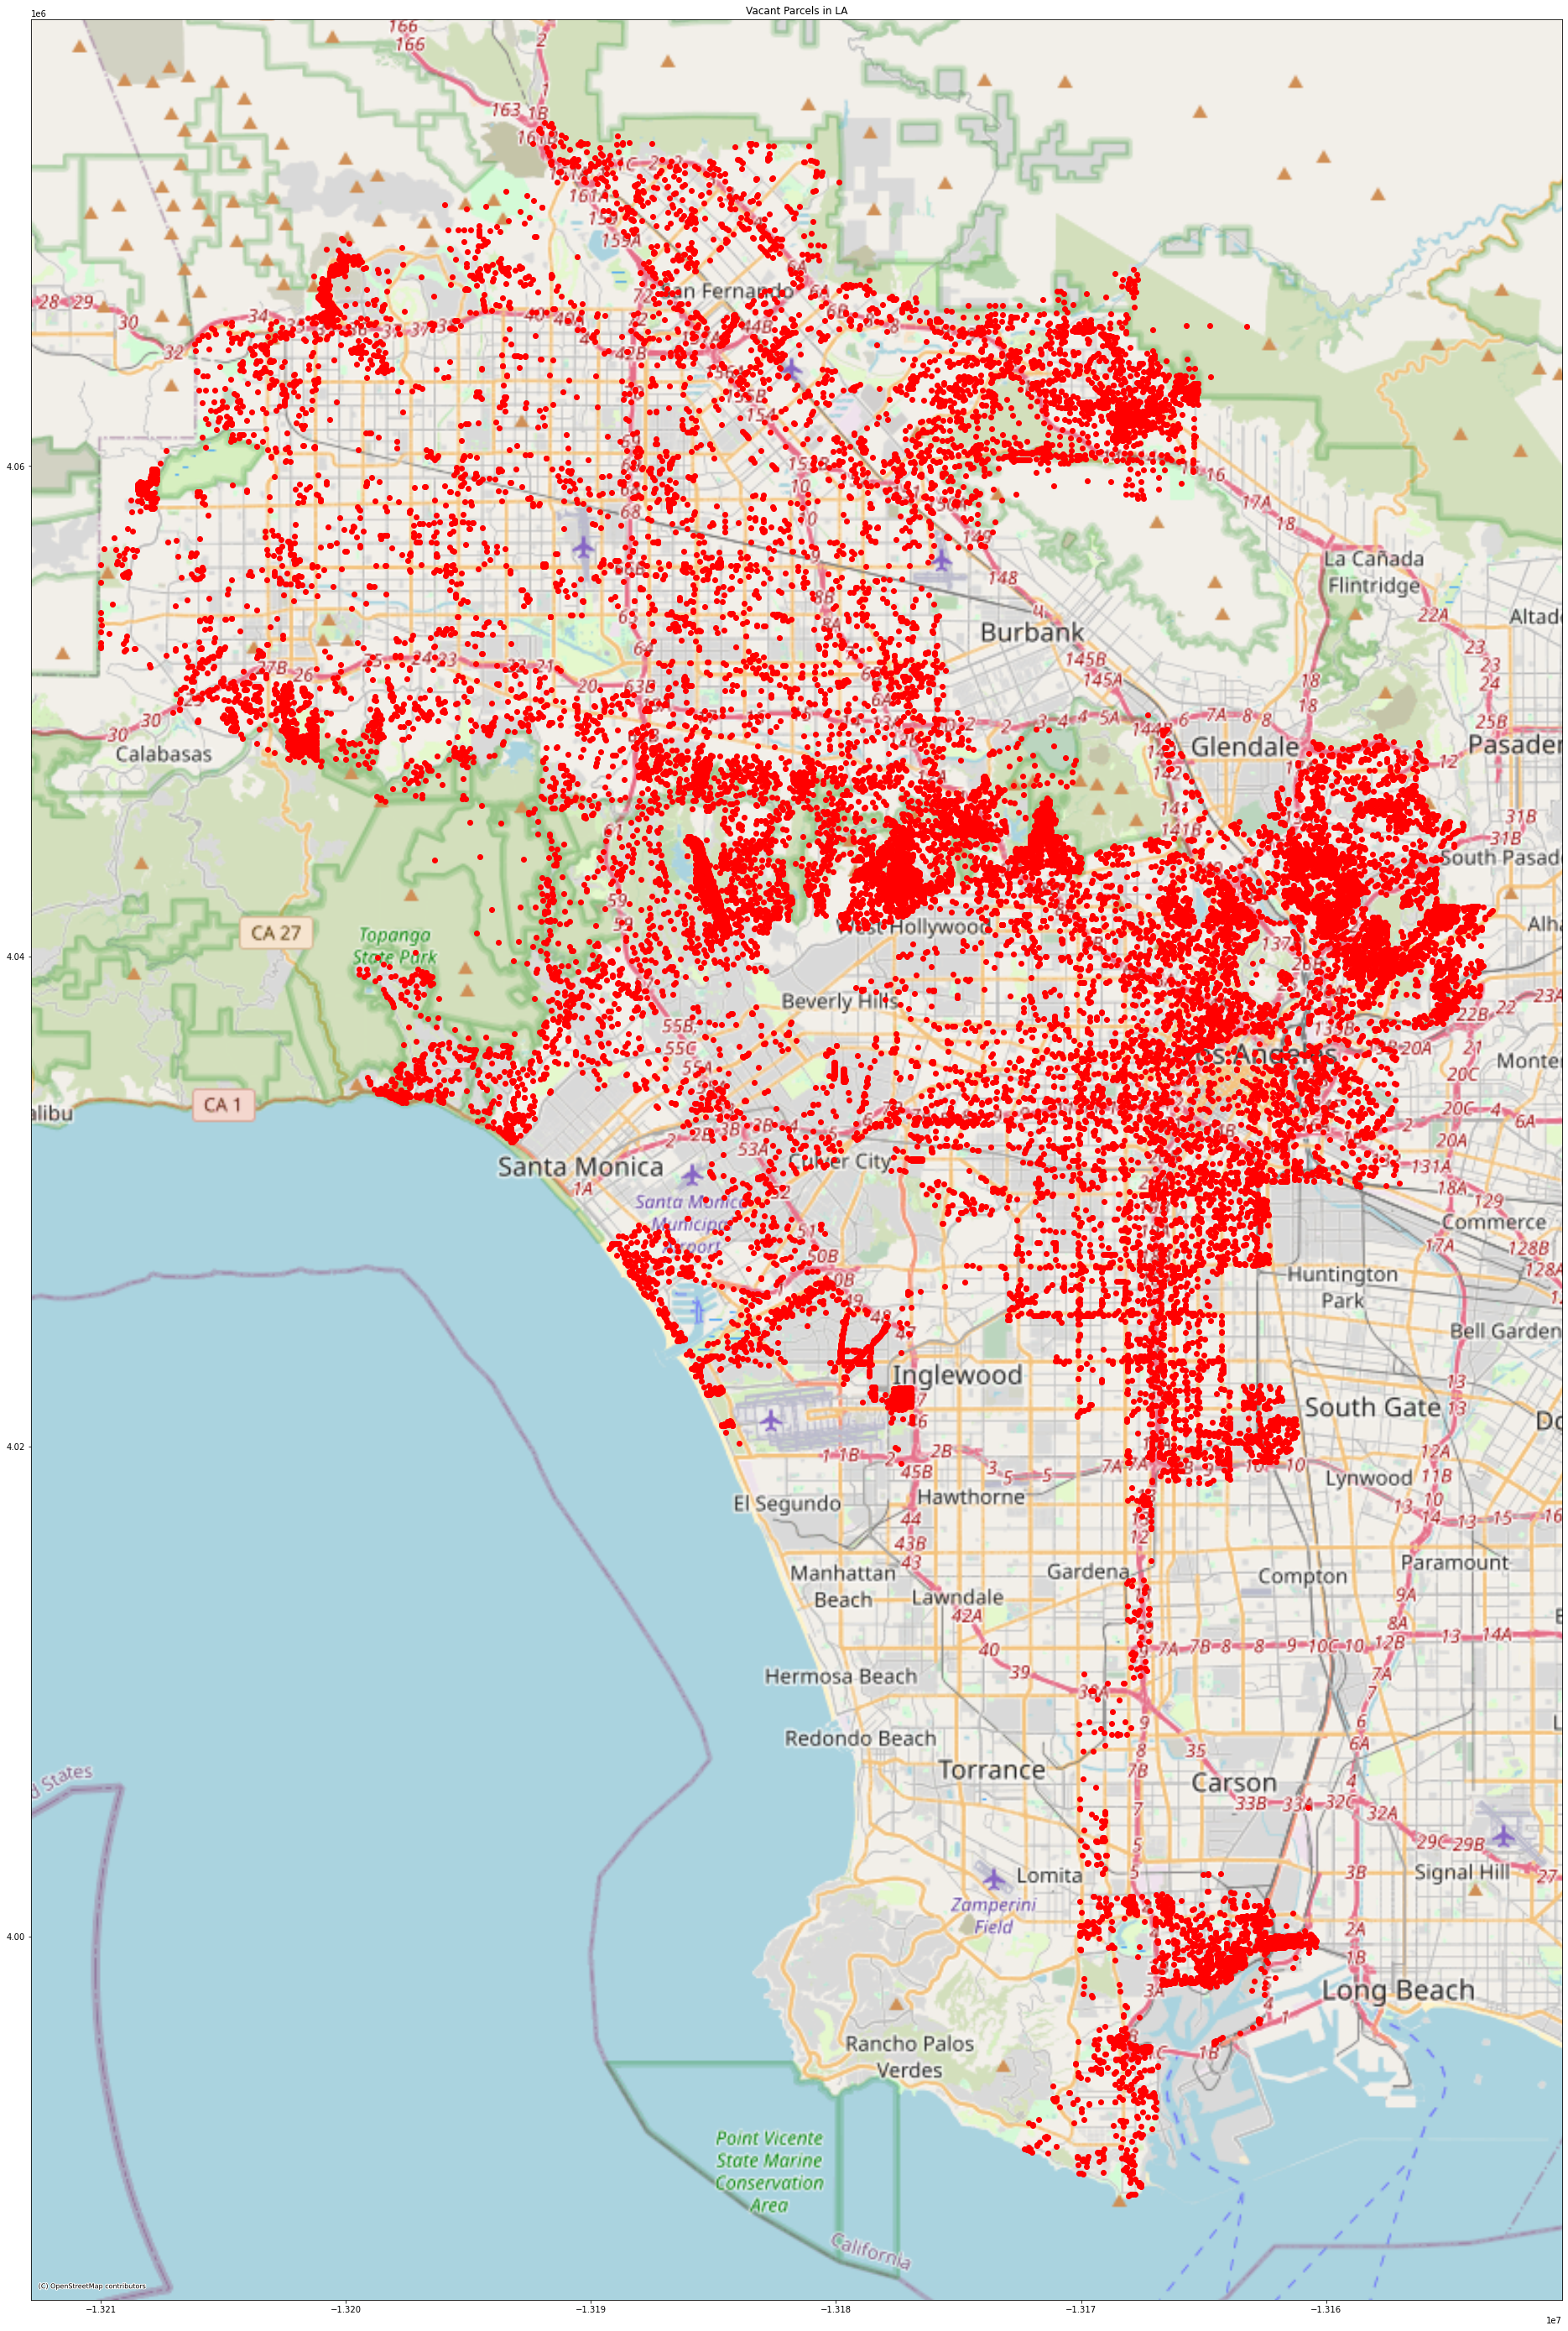

In [31]:
# map the vacant parcels
fig, ax = plt.subplots(figsize=(50,50))

vacgdf_web_mercator.plot(ax=ax,
                      color='red')

ax.axis('on')

ax.set_title('Vacant Parcels in LA')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=vacgdf_web_mercator.crs)

### seems like the map is in a focused area. After googling the streets, we found out it was by Thousand Oaks Valley. We are wondering if we can shift the center by using location parameter when calling in API data.

Now, we are going to import the community boundaries, and set and merge both.

In [9]:
#Time to import the community boundaries data set

comgdf = gpd.read_file("Community Boundaries (CSA) (1).geojson")

In [10]:
## let's check if this is already a geodataframe

type (comgdf)

geopandas.geodataframe.GeoDataFrame

In [11]:
comgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   community       261 non-null    object  
 1   source          348 non-null    object  
 2   label           348 non-null    object  
 3   city_type       348 non-null    object  
 4   objectid        348 non-null    object  
 5   lcity           348 non-null    object  
 6   shape_stlength  348 non-null    object  
 7   shape_starea    348 non-null    object  
 8   geometry        348 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 24.6+ KB


In [12]:
list(comgdf)

['community',
 'source',
 'label',
 'city_type',
 'objectid',
 'lcity',
 'shape_stlength',
 'shape_starea',
 'geometry']

<AxesSubplot:>

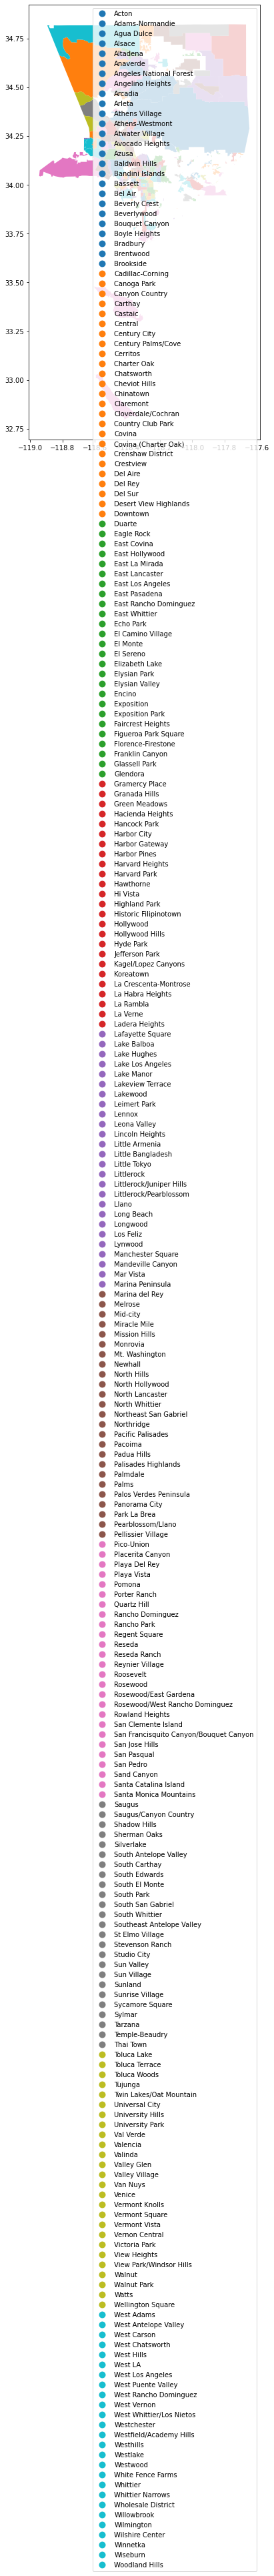

In [13]:
#let's map the community boundaries geodataframe

comgdf.plot(figsize=(12,12),
                          column='community',
                          legend=True)

### Adding Basemap 
We mapped the community boundaries and vacant lot parcels at large.

In [14]:
# now let's project to web mercator change to 4326
comgdf_wm = comgdf.to_crs(epsg=3857)

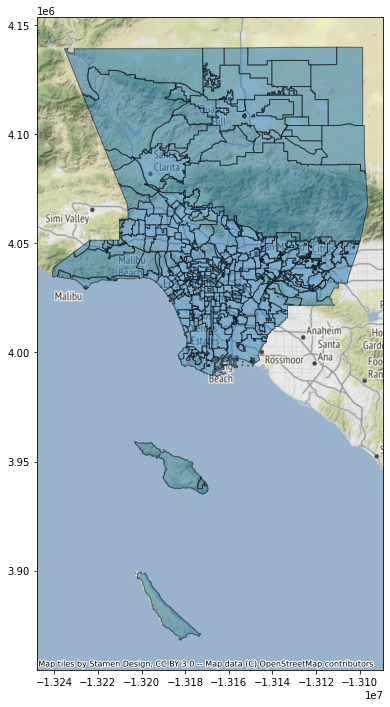

In [15]:
# Great, looks like it's all set

ax = comgdf_wm.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax) 

Yay! it is a very zoomed out map, but it is the first time we do it! 

In [16]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
vac_by_com = gpd.sjoin(comgdf, vacgdf) #Spatial join Points to polygons
vac_by_com

community   source                          label city_type  \
2    Harvard Heights  LA City  Los Angeles - Harvard Heights      City   
2    Harvard Heights  LA City  Los Angeles - Harvard Heights      City   
2    Harvard Heights  LA City  Los Angeles - Harvard Heights      City   
2    Harvard Heights  LA City  Los Angeles - Harvard Heights      City   
2    Harvard Heights  LA City  Los Angeles - Harvard Heights      City   
..               ...      ...                            ...       ...   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   

    objectid        lcity      shape_stlength        shape_starea  \
2         95  Los Angeles  21077.385705038188   20898421.74609375   
2         95  Los Angeles  21077.385705038188   20898421.74609375   
2         95  Los Angeles  21077.385705038188   20898421.74609375   
2         95  Los Angeles  21077.385705038188   20898421.74609375   
2         95  Los Angeles  21077.385705038188   20898421.74609375   
..       ...          ...                 ...                 ...   
346      174  Los Angeles  105989.43541216178  278714351.12011719   
346      174  Los Angeles  105989.43541216178  278714351.12011719   
346      174  Los Angeles  105989.43541216178  278714351.12011719   
346      174  Los Angeles  105989.43541216178  278714351.12011719   
346      174  Los Angeles  105989.43541216178  278714351.12011719   

                                              geometry  index_right  ...  \
2    MULTIPOLYGON (((-118.29156 34.04000, -118.2923...        14851  ...   
2    MULTIPOLYGON (((-118.29156 34.04000, -118.2923...        14814  ...   
2    MULTIPOLYGON (((-118.29156 34.04000, -118.2923...        14850  ...   
2    MULTIPOLYGON (((-118.29156 34.04000, -118.2923...          490  ...   
2    MULTIPOLYGON (((-118.29156 34.04000, -118.2923...        14843  ...   
..                                                 ...          ...  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...        32038  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...        32041  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...        32055  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...        32050  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...        32040  ...   

                                            location_1 bathrooms sqftmain  \
2    {'latitude': '34.04317632', 'needs_recoding': ...         0        0   
2    {'latitude': '34.04326202', 'needs_recoding': ...         0        0   
2    {'latitude': '34.0433412', 'needs_recoding': F...         0        0   
2    {'latitude': '34.04679216', 'needs_recoding': ...         0        0   
2    {'latitude': '34.04688601', 'needs_recoding': ...         0        0   
..                                                 ...       ...      ...   
346  {'latitude': '34.23666915', 'needs_recoding': ...         0        0   
346  {'latitude': '34.23763845', 'needs_recoding': ...         0        0   
346  {'latitude': '34.23473438', 'needs_recoding': ...         0        0   
346  {'latitude': '34.23480785', 'needs_recoding': ...         0        0   
346  {'latitude': '34.24068798', 'needs_recoding': ...         0        0   

    situsdirection roll_realestateexemp   center_lat    situszip yearbuilt  \
2                                     0  34.04317632                     0   
2                                     0  34.04326202                     0   
2                                     0  34.04334120                     0   
2                                     0  34.04679216                     0   
2                                     0  34.04688601  90019-4552 

We are also reminded that we are limited in data. 

In [17]:
vac_count = vac_by_com.value_counts('community').reset_index(name='vac_count')
vac_count

community  vac_count
0    Hollywood Hills       1954
1      Beverly Crest       1818
2          Hollywood       1519
3         Wilmington       1509
4     Mt. Washington       1467
..               ...        ...
137  Sycamore Square          2
138      Willowbrook          1
139   Universal City          1
140   Toluca Terrace          1
141   Marina del Rey          1

[142 rows x 2 columns]

In [18]:
# add the count to the neighborhoods
comgdf = comgdf.merge(vac_count, how='left', on='community')

In [19]:
comgdf.sample(10)

community   source                              label  \
26        West Vernon  LA City          Los Angeles - West Vernon   
73   Rancho Dominguez      BOS  Unincorporated - Rancho Dominguez   
325           Tujunga  LA City              Los Angeles - Tujunga   
134         Echo Park  LA City            Los Angeles - Echo Park   
345      Shadow Hills  LA City         Los Angeles - Shadow Hills   
137              None      BOS                     City of Vernon   
256   Avocado Heights      BOS   Unincorporated - Avocado Heights   
154              None      BOS                     City of Malibu   
174        Exposition  LA City           Los Angeles - Exposition   
339   Exposition Park  LA City      Los Angeles - Exposition Park   

          city_type objectid           lcity      shape_stlength  \
26             City      176     Los Angeles  50950.222793293055   
73   Unincorporated      297  Unincorporated  41412.454709183898   
325            City      159     Los Angeles  71574.327586648695   
134            City       77     Los Angeles  26540.216685480205   
345            City      142     Los Angeles  49148.438346517898   
137            City      216          Vernon  84939.372671181074   
256  Unincorporated      230  Unincorporated  56792.552947643751   
154            City      186          Malibu  252177.50704142114   
174            City       82     Los Angeles  13747.787962368369   
339            City       83     Los Angeles  41975.378938686146   

           shape_starea                                           geometry  \
26   70320110.637695313  MULTIPOLYGON (((-118.28266 33.98914, -118.2832...   
73   75301045.112304688  MULTIPOLYGON (((-118.20619 33.87046, -118.2061...   
325  153839505.10839844  MULTIPOLYGON (((-118.26526 34.25238, -118.2652...   
134  27755067.791992188  MULTIPOLYGON (((-118.24619 34.08774, -118.2477...   
345  85188064.301757813  MULTIPOLYGON (((-118.33580 34.26578, -118.3351...   
137  143638580.44433594  MULTIPOLYGON (((-118.19212 34.01292, -118.1921...   
256  34588444.865234375  MULTIPOLYGON (((-117.99044 34.03085, -117.9905...   
154  548914640.37988281  MULTIPOLYGON (((-118.58442 34.03786, -118.5844...   
174    9822071.76171875  MULTIPOLYGON (((-118.34603 34.02149, -118.3461...   
339  70838884.826171875  MULTIPOLYGON (((-118.29590 34.02551, -118.2948...   

     vac_count  
26       128.0  
73         NaN  
325     1409.0  
134      236.0  
345      194.0  
137        NaN  
256        NaN  
154        NaN  
174       16.0  
339      173.0

<AxesSubplot:>

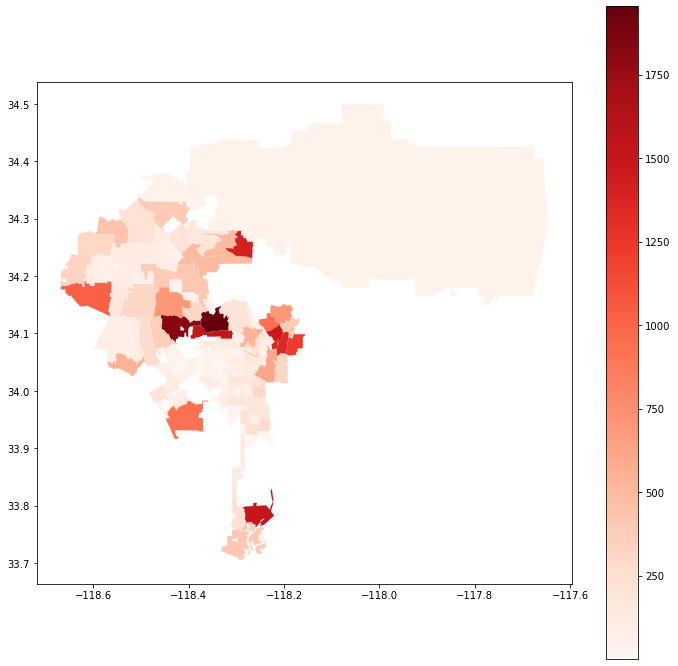

In [20]:
# choropleth map of vacant lots by community boundary
fig,ax = plt.subplots(figsize=(12,12))

comgdf.plot(ax=ax,column='vac_count',legend=True,cmap='Reds')

In [21]:
comgdf_la=comgdf[comgdf["city_type"] == "City"]

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


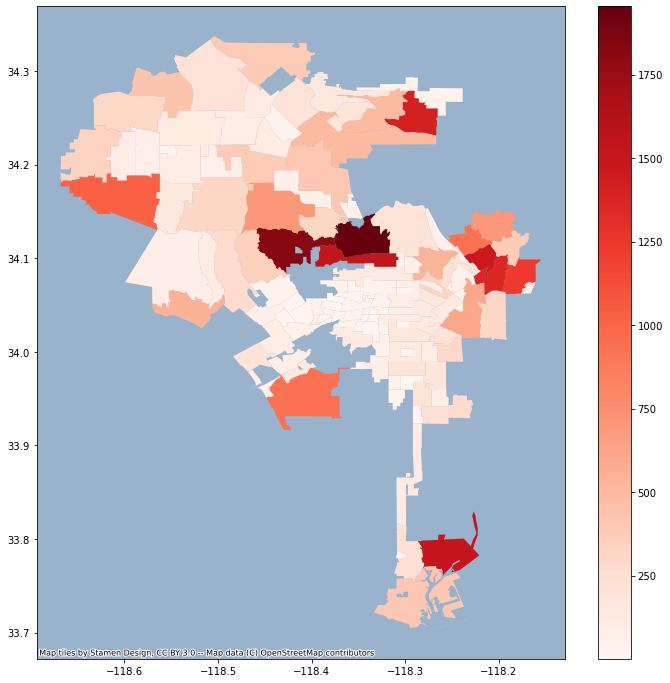

In [68]:
# project to web mercator 
comgdf = comgdf.to_crs(epsg=4326)

# choropleth map of arrests by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

comgdf_la.plot(ax=ax,column='vac_count',legend=True,cmap='Reds')

ctx.add_basemap(ax)

In [69]:
com_echo = comgdf.loc[comgdf['community'] == "Echo Park"]

In [71]:
com_echo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
vacgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
comgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
# conduct a spatial join (i.e. assign vacant plots to neighborhood)
# code to intersect vacant plot data with community boundaries...
com_echo_join = gpd.sjoin(vacgdf, com_echo, how="inner", op="within")

In [75]:
com_echo_join.head()

usecodedescchar1 roll_homeownersexemp situsunit recordingdate  \
536        Residential                    0                19981023   
537        Residential                    0                20090408   
19067      Residential                    0                19961226   
19069      Residential                    0                20020619   
19126      Residential                    0                20121224   

      effectiveyearbuilt istaxableparcel roll_totlandimp roll_perspropexemp  \
536                    0               Y            6515                  0   
537                    0               Y            2217                  0   
19067                  0               Y            1345                  0   
19069                  0               Y          150448                  0   
19126                  0               Y             989                  0   

                            parcelboundarydescription roll_landbaseyear  ...  \
536                  FELLOWSH1P HE1GHTS NO 2 LOT   26              1999  ...   
537                            TRACT NO 2467 LOT    E              1975  ...   
19067  ANGELENO HEIGHTS SE 25 FT OF LOT 73 BLK 15 1/2              1997  ...   
19069              ANGELENO HEIGHTS LOT   37 BLK   15              2002  ...   
19126  ANGELENO HEIGHTS SE 30 FT OF LOT 59 BLK 15 1/2              1975  ...   

      index_right  community   source                    label city_type  \
536           134  Echo Park  LA City  Los Angeles - Echo Park      City   
537           134  Echo Park  LA City  Los Angeles - Echo Park      City   
19067         134  Echo Park  LA City  Los Angeles - Echo Park      City   
19069         134  Echo Park  LA City  Los Angeles - Echo Park      City   
19126         134  Echo Park  LA City  Los Angeles - Echo Park      City   

      objectid        lcity      shape_stlength        shape_starea vac_count  
536         77  Los Angeles  26540.216685480205  27755067.791992188     236.0  
537         77  Los Angeles  26540.216685480205  27755067.791992188     236.0  
19067       77  Los Angeles  26540.216685480205  27755067.791992188     236.0  
19069       77  Los Angeles  26540.216685480205  27755067.791992188     236.0  
19126       77  Los Angeles  26540.216685480205  27755067.791992188     236.0  

[5 rows x 62 columns]

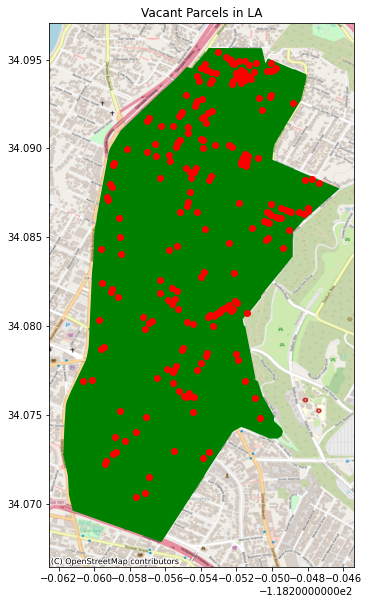

In [81]:
# map the vacant parcels
fig, ax = plt.subplots(figsize=(10,10))

com_echo.plot(ax=ax,
                      color='green')


com_echo_join.plot(ax=ax,
                      color='red')

ax.axis('on')

ax.set_title('Vacant Parcels in LA')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=com_echo_join.crs)

We are running into issues adding a basemap here. We are wondering if we need to do the (x_lim etc.) command that can help center. Lupe was also running into this issue when adding a basemap to specific census tracts.

## Using Plotly to graph

In [23]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata


### calling in data from LA County's Socrata portal

We are going to call in the vacant parcel data again. We tried 5000 to see how many parcels we could get without overwhelming our jupyter notebook and memory.

In [24]:
# connect to the data portal
client = Socrata("data.lacounty.gov", None)

# First 5000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vcaw-zeg9", limit=180000, where="taxratearea_city=='LOS ANGELES'")

# Convert to pandas DataFrame
vacant_parcels = pd.DataFrame.from_records(results)

vacant_parcels.sample(2)

usecodedescchar1 roll_homeownersexemp situsunit recordingdate  \
971       Residential                    0                20110729   
9135      Residential                    0                20071019   

     effectiveyearbuilt istaxableparcel roll_totlandimp roll_perspropexemp  \
971                   0               Y            7300                  0   
9135                  0               Y            2183                  0   

                              parcelboundarydescription roll_landbaseyear  \
971   TRACT NO 6170 THAT PART S OF A LINE PARALLEL W...              1989   
9135                             TRACT # 11581 LOT   28              2008   

      ...                                         location_1 bathrooms  \
971   ...  {'latitude': '34.14592402', 'needs_recoding': ...         0   
9135  ...  {'latitude': '33.96001987', 'needs_recoding': ...         0   

     sqftmain situsdirection roll_realestateexemp   center_lat situszip  \
971         0                                   0  34.14592402            
9135        0                                   0  33.96001987            

     yearbuilt propertylocation situszip5  
971          0              NaN       NaN  
9135         0              NaN       NaN  

[2 rows x 51 columns]

In using API it chooses what data for 5000 rows we called in. In the future, we would like to see how we could use API to select more specific parameters by column headers that don't have string or interger data.

In [25]:
# Convert to pandas DataFrame
vacant_parcels = pd.DataFrame.from_records(vacant_parcels)

In [26]:
# how many rows and columns?
vacant_parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33091 entries, 0 to 33090
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   usecodedescchar1           33080 non-null  object
 1   roll_homeownersexemp       33091 non-null  object
 2   situsunit                  33091 non-null  object
 3   recordingdate              33091 non-null  object
 4   effectiveyearbuilt         33091 non-null  object
 5   istaxableparcel            33091 non-null  object
 6   roll_totlandimp            33091 non-null  object
 7   roll_perspropexemp         33091 non-null  object
 8   parcelboundarydescription  33091 non-null  object
 9   roll_landbaseyear          33091 non-null  object
 10  situscity                  33091 non-null  object
 11  roll_impbaseyear           33091 non-null  object
 12  usetype                    33080 non-null  object
 13  cluster                    33091 non-null  object
 14  adminr

In [27]:
# what fields and datatypes?

vacant_parcels.dtypes

usecodedescchar1             object
roll_homeownersexemp         object
situsunit                    object
recordingdate                object
effectiveyearbuilt           object
istaxableparcel              object
roll_totlandimp              object
roll_perspropexemp           object
parcelboundarydescription    object
roll_landbaseyear            object
situscity                    object
roll_impbaseyear             object
usetype                      object
cluster                      object
adminregion                  object
usecodedescchar3             object
roll_fixtureexemp            object
nettaxablevalue              object
taxratearea                  object
rowid                        object
roll_landvalue               object
units                        object
taxratearea_city             object
situsfraction                object
roll_impvalue                object
usecode                      object
situsstreet                  object
parcelclassification        

In [28]:
vacant_parcels.columns

Index(['usecodedescchar1', 'roll_homeownersexemp', 'situsunit',
       'recordingdate', 'effectiveyearbuilt', 'istaxableparcel',
       'roll_totlandimp', 'roll_perspropexemp', 'parcelboundarydescription',
       'roll_landbaseyear', 'situscity', 'roll_impbaseyear', 'usetype',
       'cluster', 'adminregion', 'usecodedescchar3', 'roll_fixtureexemp',
       'nettaxablevalue', 'taxratearea', 'rowid', 'roll_landvalue', 'units',
       'taxratearea_city', 'situsfraction', 'roll_impvalue', 'usecode',
       'situsstreet', 'parcelclassification', 'assessorid',
       'roll_perspropvalue', 'bedrooms', 'usecodedescchar2', 'roll_totalvalue',
       'rollyear', 'ain', 'situshouseno', 'roll_fixturevalue',
       'usecodedescchar4', 'center_lon', 'roll_totalexemption',
       'totbuildingdatalines', 'location_1', 'bathrooms', 'sqftmain',
       'situsdirection', 'roll_realestateexemp', 'center_lat', 'situszip',
       'yearbuilt', 'propertylocation', 'situszip5'],
      dtype='object')

In [29]:
vacant_parcels.head()

usecodedescchar1 roll_homeownersexemp situsunit recordingdate  \
0       Industrial                    0                20140123   
1      Residential                    0                20141112   
2      Residential                    0                20090406   
3      Residential                    0                20111007   
4      Residential                    0                19970805   

  effectiveyearbuilt istaxableparcel roll_totlandimp roll_perspropexemp  \
0                  0               Y           42410                  0   
1                  0               Y           28000                  0   
2                  0               Y               0                  0   
3                  0               Y          114438                  0   
4                  0               Y          391931                  0   

                           parcelboundarydescription roll_landbaseyear  ...  \
0  OWENSMOUTH S 50 FT OF N 100 FT OF W 231.43 FT ...              1975  ...   
1  *LAND DESC IN DOC 0002484, 76-4-26 *TR=22481*P...              2015  ...   
2  TR=53188 FOR DESC SEE ASSESSOR'S MAPS POR OF L...              2009  ...   
3                                P M 360-55-56 LOT B              2012  ...   
4                                  TR=36573 LOT    1              1998  ...   

                                          location_1 bathrooms sqftmain  \
0  {'latitude': '34.19627608', 'needs_recoding': ...         0        0   
1  {'latitude': '34.17791177', 'needs_recoding': ...         0        0   
2  {'latitude': '34.17397819', 'needs_recoding': ...         0        0   
3  {'latitude': '34.17729595', 'needs_recoding': ...         0        0   
4  {'latitude': '34.17195503', 'needs_recoding': ...         0        0   

  situsdirection roll_realestateexemp   center_lat situszip yearbuilt  \
0                                   0  34.19627608                  0   
1                                   0  34.17791177                  0   
2                                   0  34.17397819                  0   
3                                   0  34.17729595                  0   
4                                   0  34.17195503                  0   

  propertylocation situszip5  
0              NaN       NaN  
1              NaN       NaN  
2              NaN       NaN  
3              NaN       NaN  
4              NaN       NaN  

[5 rows x 51 columns]

### we shorten our data set to remove a few columns that we did not need. 

There were originally 55 column headers, with many not applicable as the assessor uses these same columes for non-vacant parcels as well.

In [30]:
vac_par2 = vacant_parcels[['community',
                           'usecodedescchar1', 
                           'situscity', 
                           'usetype', 'cluster', 
                           'adminregion', 
                           'taxratearea',
                           'rowid', 
                           'taxratearea_city', 
                           'usecode', 
                           'parcelclassification', 
                           'center_lon', 
                           'center_lat', 
                           'situszip', 
                           'situszip5']]

KeyError: "['community'] not in index"

In [1]:
vac_par2.head()

NameError: name 'vac_par2' is not defined

In [ ]:
# how many rows and columns?
vac_par2.info()

### now, we are going to create a few graphs

using the magic of plotly!

In [ ]:
# add labels by providing a dict
fig = px.bar(
        vac_par2,
       x='community',
       title='Vacant Lots by Community',
        labels={
            'community':'Community',
            'count':'Number of parcels'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

We graphed the area by 'taxratearea_city' that gave us more insight on the location of the vacant lot parcels by neighborhoood/community boundary. 

Unsuprisingly we wee that Los Angeles incorporated has the most parcels. Once we spatialize this, we will get further insights. But this tells us that of the 5000 rows, we called in a lot within the incorporated boundaries of LA City.

In [ ]:
# add labels by providing a dict
fig = px.bar(
        vac_par2,
       x='usecodedescchar1',
       title='Types of Vacant Parcels ',
        labels={
            'usecodedescchar1':'Use Type',
            'count':'Number of parcels'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Now we get a better perspective of the assigned use of the vacant land. It is not surprising that it is for residential in a city of Los Angeles (unless we landed on data from City of Industry). Now let's map to see what section of the county our data is located in...

In [ ]:
# convert lat/lon's to floats, as we saw the object type needs to be converted
vac_par2['center_lat'] = vac_par2['center_lat'].astype(float)
vac_par2['center_lon'] = vac_par2['center_lon'].astype(float)
vac_par2.info()

In [ ]:
# important, we need to address null columns. we fill in any blank or null with "N/A"

vac_par2 = vac_par2.fillna({'usecodedescchar1':'N/A'})

In [ ]:
# plot it
fig = px.scatter(vac_par2,
           x='center_lon',
           y='center_lat'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

Now, we see all the vacant land in an area within certain longitute and latitude. Where in LA county might we be??

In [ ]:
fig = px.scatter_mapbox(vac_par2,
                        lat='center_lat',
                        lon='center_lon',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Map of Vacant Parcels in LA",
    title_x=0.5 # aligns title to center
)

fig.show()


we can zoom in and out to see that we're in the northwest corner of LA county by the Santa Monica mountains!

In [ ]:
# what will se see next, perhaps type of parcels???
fig = px.scatter_mapbox(vac_par2, 
                        lat="center_lat", 
                        lon="center_lon", 
                        color="usecodedescchar1",
                        labels={'usecodedescchar1':'Use Type'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Vacant Parcels in Los Angeles County by Use",
    title_x=0.5 # aligns title to center
)


fig.show()

As our graph earlier showed, there are alot more residential vacant parcels. Totally makes sense that some parcels are for agricultural use.

Below we will map the community boundaries to see neighborhood boundaries with the vacant parcels

In [ ]:
#setting to web mercator projection for compatibility
comgdf_wm = comgdf.to_crs(epsg=3857)

In [ ]:
#let's plot this
comgdf_wm.plot(figsize=(12,12))


In [ ]:
# convert vac_par2 to geodataframe
vacantgdf = gpd.GeoDataFrame(
    vac_par2, geometry=gpd.points_from_xy(vac_par2.center_lon, vac_par2.center_lat),crs=4326)

# check that it can be mapped
vacantgdf.plot()

In [ ]:
# conduct a spatial join each parcel to the neighborhood it is in
vacant_by_community = gpd.sjoin(comgdf, vacantgdf) #Spatial join Points to polygons
vacant_by_community

In [ ]:
# count the number of parcels per community
vacant_count = vacant_by_community.value_counts('community').reset_index(name='vacant_count')
vacant_count

In [ ]:
# add the vacant parcel count to the neighborhoods
comgdf = comgdf.merge(vacant_count, how='left', on='community')

In [ ]:
#check with a sample of our data

comgdf.sample(10)

In [ ]:
# choropleth map of vacant lot by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

comgdf.plot(ax=ax,column='vacant_count',legend=True,cmap='Reds')

In [ ]:
from keplergl import KeplerGl

# we are going to attempt to try to use KeplerGL as recommended in last week's lab
vacantmap2=KeplerGl(height=500,data={'Vacant Parcels LA':vac_par2})

In [ ]:
# show me distinct value of charges
vac_par2.grp_description.unique().tolist()

### Narrowing our scope: El Sereno and Lincoln Heights

As we learn how to bring in API by location parameters, we hope to also created a focused map in our neighborhoods of interest mentioned in our updated proposal. We will set the stage by doing further data exploration to narrow this down for future use!

In [ ]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [ ]:
# project to web meracator

comgdf.crs

In [ ]:
#locating the records for these 2 neighbrohoods

comgdf_new = comgdf.loc[[116,152]]

In [ ]:
comgdf_new.head()

In [ ]:
#plot it to see if we did this right

comgdf_new.plot(figsize=(12,12))

In [ ]:
#we are having issues using contextlily, and will try other mapping libraries next time

ax = comgdf_new.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax) 

Again, we are running into issues adding a map here. Lupe was able to do it on a separete noteback with Census tracts. This is something we should revist again.

### Lupe Renteria Salome
worked on data exploration of community boundaries map and coding to zoom into El Sereno and Lincoln heights.

### Mel Liu
workeds on data exploration of vacant parcel dataframe, and imported using API.

Both worked collaboratively on the code in this midterm notebook on the spatial join and interactive and static maps, as well as the graph.

Next step is to code vacant parcel counts for Lincoln Heights and Boyle Heights